MAE: 0.89
R2 Score: 0.03
AveRooms : 0.0648
bedrooms : 0.0054
bathrooms : 0.0091


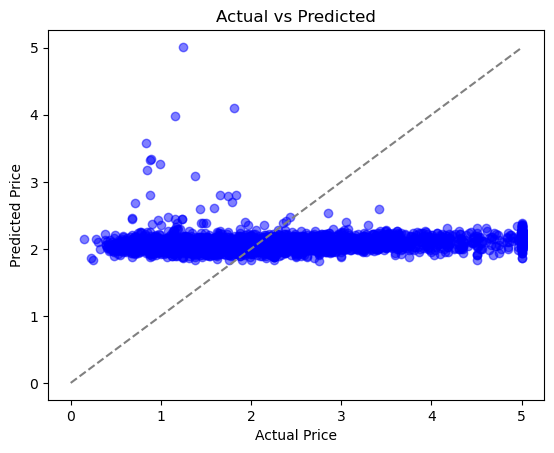

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

np.random.seed(42)
df['bedrooms'] = np.random.randint(1, 6, size=len(df))
df['bathrooms'] = np.random.randint(1, 4, size=len(df))

X = df[['AveRooms', 'bedrooms', 'bathrooms']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("R2 Score:", round(r2, 2))

for name, val in zip(X.columns, model.coef_):
    print(name, ":", round(val, 4))

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 5], [0, 5], linestyle='--', color='gray')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

